# Basic QGAN

Quantum Generative Adversarial Network capable of generating a fixed state of a single qubit. Implemented following https://arxiv.org/pdf/1804.08641.pdf by Cameron Estabrooks, Jacob Ewaniuk, Adam Grace, Spencer Hill, and Joshua Otten.


# Imports

In [3]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
np.random.seed(0)

# Real Data

In [4]:
def real(angles):
    assert len(angles == 3)
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.u(angles[0], angles[1], angles[2], 0)
    return qc

[1.76405235 0.40015721 0.97873798]


┌───┐┌───────────────────────────┐
q_0: ┤ H ├┤ U(1.7641,0.40016,0.97874) ├
     └───┘└───────────────────────────┘
c: 1/══════════════════════════════════

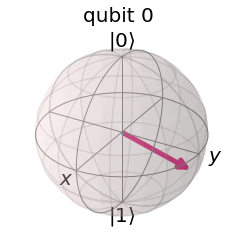

In [5]:
angs = np.random.normal(size=(3,))
print(angs)
real_qc = real(angs)
display(real_qc.draw())

state = Statevector.from_instruction(real_qc)
plot_bloch_multivector(state)

# Discriminator Function

In [ ]:
def discriminator(w, circuit):
    circuit.h(0)
    circuit.rx(w[0], 0)
    circuit.rx(w[1], 2)
    circuit.ry(w[2], 0)
    circuit.ry(w[3], 2)
    circuit.rz(w[4], 0)
    circuit.rz(w[5], 2)
    circuit.cx(0, 2)
    circuit.rx(w[6], 2)
    circuit.ry(w[7], 2)
    circuit.rz(w[8], 2)
    return circuit

# Generator Function

Meant to create a universal ansatz capable of mimicking any single-qubit gate and entanglement. Weights are available for optimization. 

In [6]:
def generator(weights, circ):
    circ.h(0)
    circ.rx(weights[0], 0)
    circ.rx(weights[1], 1)
    circ.ry(weights[2], 0)
    circ.ry(weights[3], 1)
    circ.rz(weights[4], 0)
    circ.rz(weights[5], 1)
    circ.cnot(0, 1)
    circ.rx(weights[6], 0)
    circ.ry(weights[7], 0)
    circ.rz(weights[8], 0)
    return circ
    

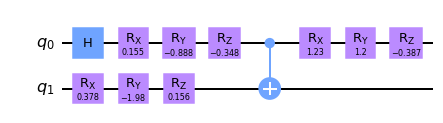

In [10]:
weights = np.random.normal(size=(9,))
qc = QuantumCircuit(2)
qc = generator(weights, qc)
display(qc.draw('mpl'))

# Cost Functions

# QGAN Training

In [26]:
# Initialize weights for discriminator and generator


In [27]:
# Discriminator Training Routine/Function
def disc_train(disc_cost_function, disc_weights, hp=None):
    """
    Trains the QGAN discriminator
    :param disc_cost_fun: Cost function for discriminator
    :param disc_weights: Weights/parameters for discriminator
    :param hp: A dictionary of hyperparameters: "steps_per_epoch", "learn_rate"
    :return:
    """
    
    if hp is None:
        hp = {"steps_per_epoch": 50, "learn_rate": 0.001}
    opt = keras.optimizers.Nadam(learning_rate=hp["learn_rate"])
    for step in range(hp["steps_per_epoch"]):
        opt.minimize(disc_cost_fun, disc_weights)

In [28]:
# Generator Training Routine/Fuction
def gen_train(gen_cost_function, gen_weights, hp=None):
    """
    Trains the QGAN discriminator
    :param gen_cost_fun: Cost function for generator
    :param gen_weights: Weights/parameters for generator
    :param hp: A dictionary of hyperparameters: "steps_per_epoch", "learn_rate"
    :return:
    """
    
    if hp is None:
        hp = {"steps_per_epoch": 50, "learn_rate": 0.001}
    opt = keras.optimizers.Nadam(learning_rate=hp["learn_rate"])
    for step in range(hp["steps_per_epoch"]):
        opt.minimize(gen_cost_fun, gen_weights)

In [29]:
# Full Training Heuristics
def train(disc_cost_fun, gen_cost_fun, disc_weights, gen_weights, hp=None):
    """
    Trains the QGAN
    :param disc_cost_fun: Cost function for discriminator
    :param gen_cost_fun: Cost function for generator
    :param disc_weights: Weights/parameters for discriminator
    :param gen_weights: Weights/parameters for generator
    :param hp: A dictionary of hyperparameters: "epochs", "steps_per_epoch", "learn_rate"
    :return:
    """
    if hp is None:
        hp = {"epochs": 1, "steps_per_epoch": 50, "learn_rate": 0.001}
    for epoch in range(hp["epochs"]):
        disc_train(disc_cost_fun, disc_weights, hp)
        gen_train(gen_cost_fun, gen_weights, hp)

# Testing

In [ ]:
# Likely still needs to be written